# Astrostatistics & Data Mining-HW4
## Ruan Hsuan Wei 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = np.genfromtxt('GRB_afterglow.dat',dtype=None,skip_header=2)

In [3]:
t=[data[i][0] for i in range(len(data))]
f=[data[i][1] for i in range(len(data))]
s=[data[i][2] for i in range(len(data))]
t=np.array(t)

### a) changepoint k=7

In [4]:
t1=[]
k=7
for i in t:
    if np.log(i)>k:
        t1.append(np.log(i)-k)
    else:
        t1.append(0)
t1=np.array(t1)

[ 9.1100656  -0.90549638 -0.5883329 ]


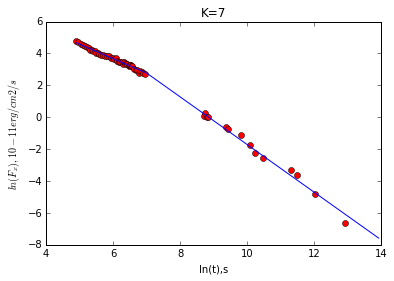

In [5]:
plt.plot(np.log(t),np.log(f),'ro')
A = np.vstack([np.ones(len(t)),np.log(t),t1]).T
coeff1=np.linalg.lstsq(A, np.log(f))[0]
print coeff1
x = np.linspace(np.log(np.min(t)), np.log(np.max(t))+1, 100)
x2=[]
for i in x:
    if i<k:
        x2.append(0)
    else:
        x2.append(i-k)
x2=np.array(x2)
plt.plot(x,coeff1[2]*x2+coeff1[1]*x+coeff1[0])
plt.ylabel("$ln(F_x), 10-11 erg/cm2/s$")
plt.xlabel("ln(t),s")
plt.title("K=7")
plt.show()

### b) changepoint k=8

In [6]:
t2=[]
k=8
for i in t:
    if np.log(i)>k:
        t2.append(np.log(i)-k)
    else:
        t2.append(0)
t2=np.array(t2)

[ 9.77929996 -1.0201752  -0.59346779]


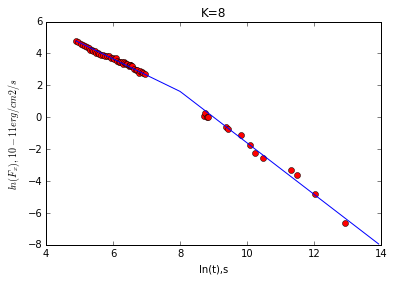

In [7]:
plt.plot(np.log(t),np.log(f),'ro')
A = np.vstack([np.ones(len(t)),np.log(t),t2]).T
coeff2=np.linalg.lstsq(A, np.log(f))[0]
print coeff2
x = np.linspace(np.log(np.min(t)), np.log(np.max(t))+1, 100)
x2=[]
for i in x:
    if i<k:
        x2.append(0)
    else:
        x2.append(i-k)
x2=np.array(x2)
plt.plot(x,coeff2[2]*x2+coeff2[1]*x+coeff2[0])
plt.ylabel("$ln(F_x), 10-11 erg/cm2/s$")
plt.xlabel("ln(t),s")
plt.title("K=8")
plt.show()

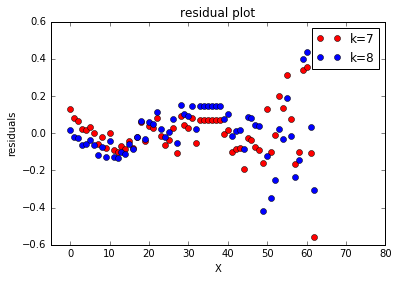

In [8]:
t=np.array(t)
res1=np.log(f)-(coeff1[2]*t1+coeff1[1]*np.log(t)+coeff1[0])
res2=np.log(f)-(coeff2[2]*t2+coeff2[1]*np.log(t)+coeff2[0])
plt.plot(res1,'ro',label='k=7')
plt.plot(res2,'bo',label='k=8')
plt.legend()
plt.xlim(-5,80)
plt.title("residual plot")
plt.ylabel("residuals")
plt.xlabel("X")

We use $R^2=1-\frac{\sum(y_i-\widehat{Y})^2}{\sum(y_i-\bar{y})^2}$ to see which model is a better fit where $\widehat{Y}$ is the model prediction at the $X_i$ location and $\bar{Y}$ is the mean of response variable.
A model is good if $R^2$ is close to 1.

In [9]:
r1=1-(np.sum(r**2 for r in res1)/np.sum((np.log(ff)-np.mean(f))**2 for ff in f))
r2=1-(np.sum(r**2 for r in res2)/np.sum((np.log(ff)-np.mean(f))**2 for ff in f))
print "R^2 when k=7 is",r1
print "R^2 when k=8 is",r2


R^2 when k=7 is 0.999983759424
R^2 when k=8 is 0.999979698912


Because the $R^2$ when k=7 is closer to one, k=7 is a better fit.

## Problem 2
### Q1-1

In [32]:
Y = np.vstack([495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
x = np.array([203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
sigy = np.array([21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])

m= [ 2.23992083] b= [ 34.04772776]


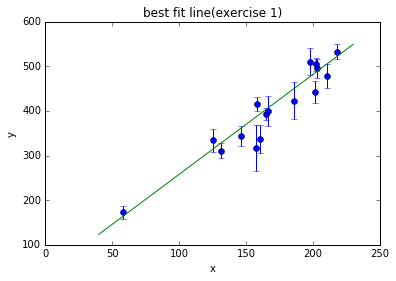

In [35]:
A=np.vstack([np.ones(len(x)),x]).T
Cinv=np.linalg.inv(np.diag(sigy**2))
b,m=np.dot(np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))),np.dot(A.T,np.dot(Cinv,Y)))
plt.errorbar(x,Y,yerr=sigy,fmt='o')
xplot=np.linspace(40,230,100)
plt.plot(xplot,b+m*xplot)
plt.ylim(100,600)
plt.xlabel("x")
plt.ylabel("y")
plt.title("best fit line(exercise 1)")
print "m=",m,"b=",b

In [12]:
print "covariance matrix:"
print np.linalg.inv(np.dot(A.T,np.dot(Cinv,A)))

covariance matrix:
[[  3.32922601e+02  -1.88954491e+00]
 [ -1.88954491e+00   1.16166311e-02]]


$\sigma^2_m=0.0116$

### Q1-2

In [13]:
Y = np.vstack([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
sigy = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])

m= [ 1.07674752] b= [ 213.27349198]


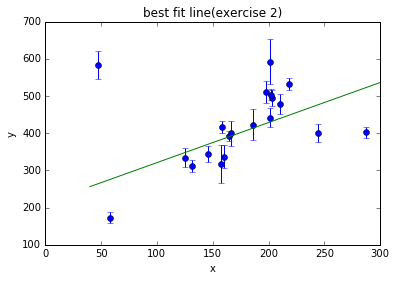

In [14]:
A=np.vstack([np.ones(len(x)),x]).T
Cinv=np.linalg.inv(np.diag(sigy**2))
b,m=np.dot(np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))),np.dot(A.T,np.dot(Cinv,Y)))
plt.errorbar(x,Y,yerr=sigy,fmt='o')
xplot=np.linspace(40,300,100)
plt.plot(xplot,b+m*xplot)
plt.xlabel("x")
plt.ylabel("y")
plt.title("best fit line(exercise 2)")
print "m=",m,"b=",b

In [15]:
print "covariance matrix:"
cov_mat=np.linalg.inv(np.dot(A.T,np.dot(Cinv,A)))
print cov_mat

covariance matrix:
[[  2.07188189e+02  -1.05427206e+00]
 [ -1.05427206e+00   5.99181008e-03]]


$\sigma^2_m=0.0059$

Compared to exercise 1, there are more outliners.

### Q1-8
#### Bootstrap:

In [16]:
y = np.array([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
sigy = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])

In [17]:
def get_m(x_boot,y_boot,sigy_boot):
    A=np.vstack([np.ones(len(x_boot)),x_boot]).T
    Y=np.vstack(y_boot)
    Cinv=np.linalg.inv(np.diag(sigy_boot**2))
    b,m=np.dot(np.linalg.inv(np.dot(A.T,np.dot(Cinv,A))),np.dot(A.T,np.dot(Cinv,Y)))
    return m

In [18]:
def bootstrap():
    rand_id = np.random.choice(len(x),len(x),replace=True)
    x_boot = x[rand_id]
    y_boot= y[rand_id]
    sigy_boot=sigy[rand_id]
    return x_boot,y_boot,sigy_boot

In [19]:
mj=[]
coeff_m= 1.07674752
for i in range(20):
    x_boot,y_boot,sigy_boot = bootstrap()
    mi = get_m(x_boot,y_boot,sigy_boot)
    mj.append(mi)
mj = np.array(mj)
sig_sq_m=np.sum(((j-coeff_m)**2) for j in mj)/len(mj)
print sig_sq_m

[ 0.38325783]


#### jackknife:

In [20]:
def jackknife(i):
    x_jack = np.delete(x,i)
    y_jack = np.delete(y,i)
    sigy_jack = np.delete(sigy,i)
    return x_jack, y_jack,sigy_jack

In [21]:
mj = []
for i in range(20):
    x_jack,y_jack,sigy_jack = jackknife(i)
    mi = get_m(x_jack,y_jack,sigy_jack)
    mj.append(mi)
mj = np.array(mj)
m = mj.mean()
# jack_sig = ((len(x)-1)*1.0/len(x))*(np.array([(mi-m)**2 for mi in mj]).sum())
jack_sig=(len(mj)-1)*np.sum(((j-m)**2) for j in mj)/len(mj)
print jack_sig

[ 0.76394608]


Jackknife method gives us a bigger uncertainty than bootstrap. By looking at our plot, we see that there are some outliners. Those outliners can affect our regression dramatically. Therefore, I think Jackknife method is more reasonable given our data.

### 2b

Compared to the theoretical data, there is a significant difference between the uncertainty we got from calculating the matrices and the uncertainty we got from jackknife and bootstrap method. The 3 conditions mentioned in the Hogg et al. (2010) paper might be the reason of the significant difference.

### 2c

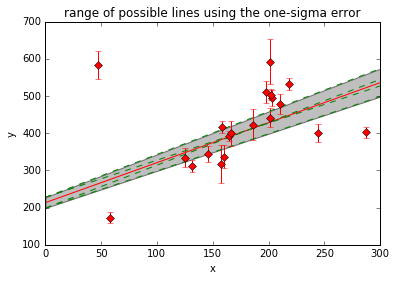

In [22]:
x_plot = np.linspace(0.1,300,300)
line_mid = m*x_plot+b
line_upper = (m+cov_mat[1][1]**0.5)*x_plot+(b+cov_mat[0][0]**0.5)
line_upper1 = (m+cov_mat[1][1]**0.5)*x_plot+(b-cov_mat[0][0]**0.5)
line_lower = (m-cov_mat[1][1]**0.5)*x_plot+(b-cov_mat[0][0]**0.5)
line_lower1 = (m-cov_mat[1][1]**0.5)*x_plot+(b+cov_mat[0][0]**0.5)
plt.plot(x_plot,line_mid,'r-')
plt.plot(x_plot,line_upper,'g--')
plt.plot(x_plot,line_upper1,'g--')
plt.plot(x_plot,line_lower1,'g--')
plt.plot(x_plot,line_lower,'g--')
plt.errorbar(x,y,sigy,fmt='rD')
plt.fill_between(x_plot,line_upper,line_lower,facecolor='gray',alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("range of possible lines using the one-sigma error")
plt.show()

## problem 3

### 3a

In [23]:
data = np.genfromtxt('22 galaxy.dat',dtype=None)

In [24]:
M=[data[i][4] for i in range(len(data))]
sig=[data[i][11] for i in range(len(data))]
sig=np.array(sig)
sig=(sig*1.0)/200
erry=[(math.log(data[i][8],10)-math.log(data[i][6],10))/2 for i in range(len(data))]
errx=[0.2*0.432]
for i in range(21):
    errx.append(0.05*0.432)

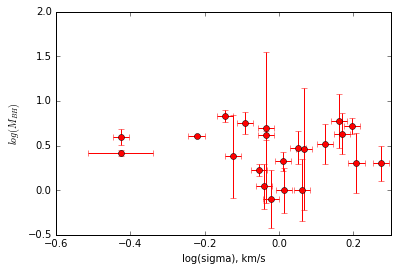

In [25]:
siglog=np.log10(sig)
Mlog=np.log10(M)
plt.errorbar(siglog,Mlog,yerr=erry,xerr=errx,fmt='ro')
plt.xlabel('log(sigma), km/s')
plt.ylabel('$log(M_{BH})$')
plt.show()

### 3b

In [26]:
from scipy import optimize
from astroML.linear_model import TLS_logL
from astroML.plotting.mcmc import convert_to_stdev

def get_m_b(beta):
    b = np.dot(beta, beta) / beta[1]
    m = -beta[0] / beta[1]
    return m, b

In [27]:
data = np.genfromtxt('22 galaxy.dat',dtype=None)
y=[data[i][4] for i in range(len(data))]
x=[data[i][11] for i in range(len(data))]
sigma_y=[(math.log(data[i][8],10)-math.log(data[i][6],10))/2 for i in range(len(data))]
sigma_x=[0.2*0.432]
for i in range(21):
    sigma_x.append(0.05*0.432)

rho_xy = [0 for i in range(len(x))]
x=np.array(x)
x=(x*1.0)/200
x=np.log10(x)
y=np.array(np.log10(y))
sigma_x=np.array(sigma_x)
sigma_y=np.array(sigma_y)
rho_xy=np.array(rho_xy)


In [28]:
# Find best-fit parameters
X = np.vstack((x, y)).T
dX = np.zeros((len(x), 2, 2))
dX[:, 0, 0] = sigma_x ** 2
dX[:, 1, 1] = sigma_y ** 2
dX[:, 0, 1] = dX[:, 1, 0] = rho_xy * sigma_x * sigma_y

min_func = lambda beta: -TLS_logL(beta, X, dX)
beta_fit = optimize.fmin(min_func,x0=[-1, 1])

Optimization terminated successfully.
         Current function value: 27.799228
         Iterations: 44
         Function evaluations: 82


Y=mx+b,m= 0.240575448335 b= 0.63058690792


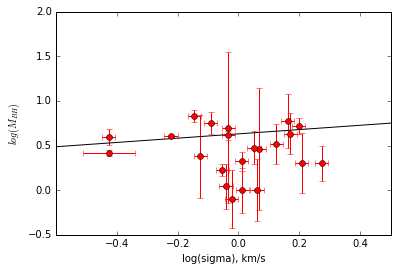

In [29]:
m_fit, b_fit = get_m_b(beta_fit)
x_fit = np.linspace(-0.6, 0.5, 10)
plt.plot(x_fit, m_fit * x_fit + b_fit, '-k')
print "Y=mx+b,m=",m_fit,"b=",b_fit
plt.xlim(-0.6, 0.5)
plt.ylim(-0.5, 2)

plt.xlabel('log(sigma), km/s')
plt.ylabel('$log(M_{BH})$')
plt.errorbar(x,y,yerr=sigma_y,xerr=sigma_x,fmt='ro')
plt.show()


### 3c

Using BCES method:

Y=Bx+a,B= 0.964756863123 a= 0.447535003721


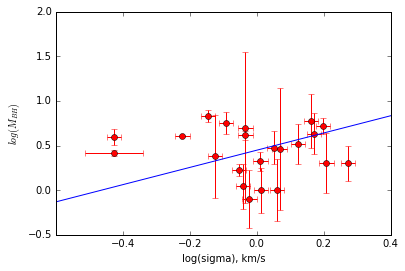

In [30]:
import bces
a,b,aerr,berr,covab=bces.bces(x,sigma_x,y,sigma_y,dX)
print "Y=Bx+a,B=",a[1],"a=",b[1]

bces_x= np.linspace(-0.6, 0.4, 10)
plt.errorbar(x,y,yerr=sigma_y,xerr=sigma_x,fmt='ro')
plt.plot(bces_x, a[1] * bces_x + b[1])
plt.xlim(-0.6,0.4)
plt.xlabel('log(sigma), km/s')
plt.ylabel('$log(M_{BH})$')
plt.show()